In [1]:
import sys
import os
import psychopy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders

from functions.utilities import determine_sequence

In [9]:
n_trials = 100

# Define the options for trial parameters
trial_options = ["45", "135", "none"]
edge_options = ["up", "down", "left", "right"]
bounce_options = [True, False]
rand_bounce_direction_options = ["left", "right"]
ball_change_options = [True, False]
rand_speed_change_options = ["slower", "faster"]

# Create deterministically randomised; balanced parameter sequences
trials = determine_sequence(n_trials, trial_options, randomised=True)
edges = determine_sequence(n_trials, edge_options, randomised=True)
bounces = determine_sequence(n_trials, bounce_options, randomised=True)
rand_bounce_directions = determine_sequence(n_trials, rand_bounce_direction_options, randomised=True)
ball_changes = determine_sequence(n_trials, ball_change_options, randomised=True)
rand_speed_changes = determine_sequence(n_trials, rand_speed_change_options, randomised=True)


In [10]:
def count_list_types(list):
    return {i: list.count(i) for i in list}

In [56]:
import os
import pandas as pd

file_stack = []
datafiles = os.listdir("/Users/wiegerscheurer/repos/physicspred/data/subject_stront/task_01")
for file in datafiles:
    if file.endswith(".csv"):
        this_file = pd.read_csv("/Users/wiegerscheurer/repos/physicspred/data/subject_stront/task_01/" + file)
        file_stack.append(this_file)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(file_stack, ignore_index=True)

# Now combined_df contains all the data from the CSV files
print(combined_df)

    trial interactor  bounce  bounce_moment random_bounce_direction  \
0       1       none   False            NaN                     NaN   
1       2         45   False            NaN                     NaN   
2       3        135    True       7.580126                     NaN   
3       4       none   False            NaN                     NaN   
4       5        135    True       7.466881                     NaN   
..    ...        ...     ...            ...                     ...   
67      2       none   False            NaN                     NaN   
68      3       none    True       4.828096                   right   
69      4       none   False            NaN                     NaN   
70      5       none    True       4.847451                   right   
71      6       none    True       4.826314                    left   

    target_onset speed_change  ball_change  abs_congruent  sim_congruent  ...  \
0       8.180088       faster         True           True         

### On what basis to filter?
### Accuracy for targets, but also number of false positives (respond when no change)
### Both are indicative of how well someone has simulated
### But not sure if you should include them in both, or combine them, in what way
### I guess you could just add the trials where you've responded wrongly to the missed targets for a category
### But this I should discuss with micha and floris
### Because in a sense every non-response when there's no target is also a good percept
### So first just look at the target present trials

In [66]:
def target_hits(df):
    """Compute the accuracy of detected targets in trials congruent with
    either simulated or abstracted spatiotemporal predictions.

    Args:
        df (pd.dataframe): The data
    """    
    # Filter rows where there was a target
    hypotheses = ["simulation", "abstraction"]
    for hypothesis in hypotheses:
        other_hypothesis = [h for h in hypotheses if h != hypothesis][0]
        filtered_df = df[
            (df['ball_change'] == True) & 
            (df[hypothesis[:3] + '_congruent'] == True) & 
            (~df[other_hypothesis[:3] + '_congruent'])
        ]

        # Select the accuracy column from the filtered DataFrame
        accuracy_values = filtered_df['accuracy']

        # print(accuracy_values)

        print(f"{hypothesis} = {np.mean(accuracy_values)}")
        
def overall_accuracy(df):
    """Compute the accuracy of detected targets in trials congruent with
    either simulated or abstracted spatiotemporal predictions.

    Args:
        df (pd.dataframe): The data
    """    
    # Filter rows where there was a target
    hypotheses = ["simulation", "abstraction"]
    for hypothesis in hypotheses:
        other_hypothesis = [h for h in hypotheses if h != hypothesis][0]
        filtered_df = df[
            (df[hypothesis[:3] + '_congruent'] == True) & 
            (~df[other_hypothesis[:3] + '_congruent'])
        ]

        # Select the accuracy column from the filtered DataFrame
        accuracy_values = filtered_df['accuracy']

        # print(accuracy_values)

        print(f"{hypothesis} = {np.mean(accuracy_values)}")
        
        
target_hits(combined_df)


simulation = 0.7692307692307693
abstraction = 0.8333333333333334


In [65]:
new_df = combined_df.copy()

# TUrn all accuracy values that are NaN into True
new_df["accuracy"] = new_df["accuracy"].fillna(True)
# new_df[new_df["accuracy"]]

new_df

overall_accuracy(new_df)


simulation = 0.6774193548387096
abstraction = 0.6923076923076923


/var/folders/3n/yy1xjnlj5zd3nt4r1202183h0000gn/T/ipykernel_35529/639964880.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df["accuracy"] = new_df["accuracy"].fillna(True)


In [42]:
import numpy as np

# Assuming combined_df is your DataFrame
# Filter rows where ball_change is True and sim_congruent is True
hypotheses = ["simulation", "abstraction"]
for hypothesis in hypotheses:
    other_hypothesis = [h for h in hypotheses if h != hypothesis][0]
    filtered_df = combined_df[
        (combined_df['ball_change'] == True) & 
        (combined_df[hypothesis[:3] + '_congruent'] == True) & 
        (~combined_df[other_hypothesis[:3] + '_congruent'])
    ]

    # Select the accuracy column from the filtered DataFrame
    accuracy_values = filtered_df['accuracy']

    # print(accuracy_values)

    print(f"{hypothesis}={np.mean(accuracy_values)}")

simulation=0.7692307692307693
abstraction=0.8333333333333334


In [11]:
count_list_types(trials)

{'none': 33, '135': 33, '45': 34}

In [52]:
# def compute_rfpreds(hypothesis:str, interactor:str | None, start_pos:str, end_pos:str):
#     # h_extremes = ["left", "right"]
#     # v_extremes = ["top", "down"]
#     directions = {"top": "v",
#                   "right": "h", 
#                   "down": "v", 
#                   "left": "h"}
    
    
#     if hypothesis == "abs":
#         if directions[start_pos] == directions[end_pos]:
            

#     pass

locations = {"top": (0, 1),
              "right": (1, 2), 
              "down": (2, 1),
              "left": (1, 0)}

# derivatives, or row and column changes (y, x)
top_direction = (1, 0)
right_direction = (0, 1)
down_direction = (-1, 0)
left_direction = (0, -1)





# This should be possible with computation
# RAW lookup table:
path_conversion = {
    "start_pos": ["top", "right", "down", "left"],
    "45": ["left", "down", "right", "top"], 
    "135": ["right", "top", "left", "down"],
}

coords = np.zeros((3,3))

coords[0, 1] = 1

coords[2,1] = 2

# def direction_change(start_pos:str, interactor:str | None):
    

# plt.imshow(coords, extent=[0, 3, 0, 3])

# plt.imshow(coords)

# coords

In [222]:
def _dir_to_vec(direction:str) -> tuple:
    """Turn direction string into vector representation
    Args:
        direction (str): The direction string
    Returns:
        tuple: The vector representation in row,column (y,x)
    """    
    directions = {"top": (1, 0),
              "right": (0, 1), 
              "down": (-1, 0),
              "left": (0, -1)}
    
    return directions[direction]

def _vec_to_dir(vector:tuple) -> str:
    """Turn vector representation into direction string
    Args:
        vector (tuple): The vector representation in row,column (y,x)
    Returns:
        str: The direction string
    """    
    vectors = {(1, 0): "top",
              (0, 1): "right", 
              (-1, 0): "down",
              (0, -1): "left"}
    
    return vectors[vector]


## Not really needed though
def _dir_to_loc(direction:str) -> tuple:
    """Turn direction string into location representation
    Args:
        direction (str): The direction string
    Returns:
        tuple: The location representation in row,column (y,x)
    """    
    locations = {"top": (0, 1),
              "right": (1, 2), 
              "down": (2, 1),
              "left": (1, 0)}
    
    return locations[direction]

def _startpos_to_dir(start_pos:str) -> str:
    """Turn start position string into direction string
    Args:
        start_pos (str): The start position string
    Returns:
        str: The direction string
    """    
    startpos = {"top": "down",
                "right": "left",
                "down": "top",
                "left": "right"}
    
    return startpos[start_pos]

def _rotate_90(start_direction, left_or_right):
    """
    Rotate a 2D vector by 90 degrees in the specified direction.
    
    Args:
        start_direction (tuple): The initial direction vector as a tuple of two elements.
        left_or_right (str): The direction to rotate, either "left" or "right".
    
    Returns:
        tuple: The rotated direction vector as a tuple of two elements (y, x) or (row, column).
    """
    if type(start_direction) != tuple:
        start_direction = _dir_to_vec(start_direction)
    
    # Define the rotation matrix for 90 degrees
    rotation_matrix_90 = np.array([[0, -1], [1, 0]])
    rotation_matrix_270 = np.array([[0, 1], [-1, 0]])

    towards = {"left": rotation_matrix_270,
               "right": rotation_matrix_90}

    # Convert the direction tuple to a numpy array
    direction_vector = np.array(start_direction)
    
    # Perform the matrix multiplication to rotate the vector
    rotated_vector = np.dot(towards[left_or_right], direction_vector)
    # Convert the result back to a tuple and return
    return tuple(rotated_vector)

def _flip_dir(direction: str | tuple) -> str | tuple:
    """Where does the ball end up, given a direction? Assuming a continuous path, so no collision anymore.
        This basically just flips the direction value to the opposite on the relevant axis.

    Args:
        direction (str | tuple): Where does the ball go?

    Returns:
        str | tuple: The opposite point of the field.
    """    
    if isinstance(direction, str):
        flipped_dir = _vec_to_dir(tuple(dir_axis * -1 for dir_axis in _dir_to_vec(direction)))
    elif isinstance(direction, tuple):
        flipped_dir = tuple(dir_axis * -1 for dir_axis in direction)
    else:
        raise ValueError("Direction must be either a string or a tuple")
    
    return flipped_dir

def _bounce_ball(start_direction: str, interactor: str):
    """
    Bounces a ball based on the start direction and the type of interactor.

    Parameters:
    start_direction (str): The initial direction of the ball.
    interactor (str): The type of interactor.

    Returns:
    str: The new direction of the ball after bouncing.

    """
    # if interactor == "none":
    #     end_direction = tuple(dir_axis * -1 for dir_axis in _dir_to_vec(start_direction)) # Flip direction to get endpoint
    if interactor == "45":
        relative_direction = "left" if start_direction in ["right", "left"] else "right"
        end_loc = _rotate_90(start_direction=start_direction, left_or_right=relative_direction)
    elif interactor == "135":
        relative_direction = "left" if start_direction in ["top", "down"] else "right"
        end_loc = _rotate_90(start_direction=start_direction, left_or_right=relative_direction)
    else:
        end_loc = _dir_to_vec(start_direction) # When no interactor, ball ends up in the same direction
        
    end_direction = _flip_dir(end_loc)
    
    return _vec_to_dir(end_direction)
    
# def predict_ball_path(hypothesis:str, interactor:str, start_pos:str, end_pos:str):
#     """
#     Predict the path of a ball based on the given parameters.
    
#     Args:
#         predictor (str): The predictor hypothesis, either "abs" or "rel".
#         interactor (str): The interactor hypothesis, either "none" or "abs".
#         start_pos (str): The starting position of the ball.
#         end_pos (str): The ending position of the ball.
    
#     Returns:
#         list: A list of tuples representing the path of the ball.
#     """
#     pred_to_input = {"top": [0],
#                      "right": [0],
#                      "down": [0],
#                      "left": [0]}
    
#     # NOTE: Predictions are about the ball direction AFTER collision, so it's 0 for start positions
#     if hypothesis == "abs":
#         pred_to_input[_flip_dir(start_pos)] = [1] # Opposite of start position
        
#     elif hypothesis == "sim":
#         # NOTE: flip_dir is used to get the ball direction based on the start location
#         predicted_dir = _bounce_ball(start_direction=_flip_dir(start_pos), interactor=interactor)
#         predicted_endloc = _flip_dir(predicted_dir) # Flip direction to get endpoint
#         pred_to_input[predicted_endloc] = [1]
        
#     for receptive_field in pred_to_input.keys():
#         print(receptive_field)
#         pred_to_input[receptive_field].append(0) # Add column for sensory input
#     pred_to_input[end_pos][1] = 1 # Change to 1 for end position
    
#     return pred_to_input


import matplotlib.pyplot as plt

def plot_positions(start_pos, end_pos, pred_to_input, interactor):
    positions = {"top": (0, 1), "right": (1, 0), "down": (0, -1), "left": (-1, 0)}
    
    fig, ax = plt.subplots()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    # Plot start position
    start_coords = positions[start_pos]
    ax.plot(start_coords[0], start_coords[1], 'go', markersize=10, label='Start Position', alpha=.5)
    
    # Plot end position
    end_coords = positions[end_pos]
    ax.plot(end_coords[0], end_coords[1], 'ro', markersize=10, label='End Position', alpha=.5)
    
    # Plot predicted positions
    for pos, value in pred_to_input.items():
        if value[0] == 1:
            pred_coords = positions[pos]
            ax.plot(pred_coords[0], pred_coords[1], 'bo', markersize=10, label='Predicted Position', alpha=.5)
    
    # Add diagonal stripe based on interactor value
    if interactor == "45":
        ax.plot([-.2, .2], [-.2, .2], 'k-', label='45° interactor')
    elif interactor == "135":
        ax.plot([-.2, .2], [.2, -.2], 'k-', label='135° interactor')
    
    ax.legend()
    ax.axis("off")
    plt.show()

def predict_ball_path(hypothesis: str, interactor: str, start_pos: str, end_pos: str, plot: bool = False):
    """
    Predict the path of a ball based on the given parameters.
    
    Args:
        hypothesis (str): The predictor hypothesis, either "abs" or "rel".
        interactor (str): The interactor hypothesis, either "none" or "abs".
        start_pos (str): The starting position of the ball.
        end_pos (str): The ending position of the ball.
        plot (bool): Whether to plot the positions or not.
    
    Returns:
        dict: A dictionary representing the path of the ball.
    """
    pred_to_input = {"top": [0],
                     "right": [0],
                     "down": [0],
                     "left": [0]}
    
    # NOTE: Predictions are about the ball direction AFTER collision, so it's 0 for start positions
    if hypothesis == "abs":
        pred_to_input[_flip_dir(start_pos)] = [1] # Opposite of start position
        
    elif hypothesis == "sim":
        # NOTE: flip_dir is used to get the ball direction based on the start location
        predicted_dir = _bounce_ball(start_direction=_flip_dir(start_pos), interactor=interactor)
        predicted_endloc = _flip_dir(predicted_dir) # Flip direction to get endpoint
        pred_to_input[predicted_endloc] = [1]
        
    for receptive_field in pred_to_input.keys():
        print(receptive_field)
        pred_to_input[receptive_field].append(0) # Add column for sensory input
    pred_to_input[end_pos][1] = 1 # Change to 1 for end position
    
    if plot:
        plot_positions(start_pos, end_pos, pred_to_input, interactor)
    
    return pred_to_input
        

In [243]:
import matplotlib.pyplot as plt

def plot_positions(start_pos, end_pos, pred_to_input, interactor):
    positions = {"top": (0, 1), "right": (1, 0), "down": (0, -1), "left": (-1, 0)}
    
    fig, ax = plt.subplots()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    # Plot start position
    start_coords = positions[start_pos]
    ax.plot(start_coords[0], start_coords[1], 'go', markersize=10, label='Start Position', alpha=.5)
    
    # Plot end position
    end_coords = positions[end_pos]
    ax.plot(end_coords[0], end_coords[1], 'ro', markersize=10, label='End Position', alpha=.5)
    
    # Plot predicted positions
    for pos, value in pred_to_input.items():
        if value[0] == 1:
            pred_coords = positions[pos]
            ax.plot(pred_coords[0], pred_coords[1], 'bo', markersize=10, label='Predicted Position', alpha=.5)
    
    # Add diagonal stripe based on interactor value
    if interactor == "45":
        ax.plot([-.2, .2], [-.2, .2], 'k-', label='45° interactor')
    elif interactor == "135":
        ax.plot([-.2, .2], [.2, -.2], 'k-', label='135° interactor')
    
    ax.legend()
    ax.axis("off")
    plt.show()

def predict_ball_path(hypothesis: str, interactor: str, start_pos: str, end_pos: str, plot: bool = False):
    """
    Predict the path of a ball based on the given parameters.
    
    Args:
        hypothesis (str): The predictor hypothesis, either "abs" or "rel".
        interactor (str): The interactor hypothesis, either "none" or "abs".
        start_pos (str): The starting position of the ball.
        end_pos (str): The ending position of the ball.
        plot (bool): Whether to plot the positions or not.
    
    Returns:
        dict: A dictionary representing the path of the ball.
    """
    pred_to_input = {"top": [0],
                     "right": [0],
                     "down": [0],
                     "left": [0]}
    
    # NOTE: Predictions are about the ball direction AFTER collision, so it's 0 for start positions
    if hypothesis == "abs":
        pred_to_input[_flip_dir(start_pos)] = [1] # Opposite of start position
        
    elif hypothesis == "sim":
        # NOTE: flip_dir is used to get the ball direction based on the start location
        predicted_dir = _bounce_ball(start_direction=_flip_dir(start_pos), interactor=interactor)
        predicted_endloc = _flip_dir(predicted_dir) # Flip direction to get endpoint
        pred_to_input[predicted_endloc] = [1]
        
    for receptive_field in pred_to_input.keys():
        pred_to_input[receptive_field].append(0) # Add column for sensory input
    pred_to_input[end_pos][1] = 1 # Change to 1 for end position

    # Turn the dictionary list values into tuples    
    pred_to_input_tuples = {key: tuple(value) for key, value in pred_to_input.items()}

    if plot:
        plot_positions(start_pos, end_pos, pred_to_input, interactor)
    
    return pred_to_input_tuples

In [264]:
oei = {"sok": (0,1)}
np.array(oei["sok"])

kont = (0, 1)

np.array((kont[1], kont[0]))

array([1, 0])

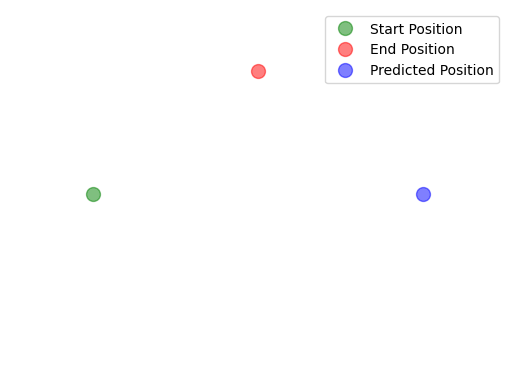

In [256]:
oei = predict_ball_path(hypothesis="abs", interactor="none", start_pos="left", end_pos="top", plot=True)


In [254]:
kont = (1, 1)
print(sum(kont))



2


In [245]:
exp_data = {
    "abs_rftop": [],
    "abs_rfright": [],
    "abs_rfdown": [],
    "abs_rfleft": [],
    "sim_rftop": [],
    "sim_rfright": [],
    "sim_rfdown": [],
    "sim_rfleft": []
}

# exp_data["abs_rftop"].append(None)  # Placeholder for absolute RF top
# exp_data["abs_rfright"].append(None)  # Placeholder for absolute RF right
# exp_data["abs_rfdown"].append(None)  # Placeholder for absolute RF down
# exp_data["abs_rfleft"].append(None)  # Placeholder for absolute RF left
# exp_data["sim_rftop"].append(None)  # Placeholder for simulated RF top
# exp_data["sim_rfright"].append(None)  # Placeholder for simulated RF right
# exp_data["sim_rfdown"].append(None)  # Placeholder for simulated RF down
# exp_data["sim_rfleft"].append(None)  # Placeholder for simulated RF left

In [252]:
for hypothesis in ["abs", "sim"]:
    pred_to_input = predict_ball_path(hypothesis=hypothesis, interactor="45", start_pos="top", end_pos="left")
    for location in pred_to_input.keys():
        exp_data[f"{hypothesis}_rf{location}"] = pred_to_input[location]
        

In [253]:
exp_data

{'abs_rftop': (0, 0),
 'abs_rfright': (0, 0),
 'abs_rfdown': (1, 0),
 'abs_rfleft': (0, 1),
 'sim_rftop': (0, 0),
 'sim_rfright': (0, 0),
 'sim_rfdown': (0, 0),
 'sim_rfleft': (1, 1)}

In [191]:
predict_ball_path(hypothesis="sim", interactor="45", start_pos="top", end_pos="left")
# IMPORTANT DIFFERENCE HERE IS THAT THE ARGUMENT IS THE START LOCATION, NOT DIRECTION (CONFUSING)

top
right
down
left


{'top': [0, 0], 'right': [0, 0], 'down': [0, 0], 'left': [1, 1]}

In [175]:
predicted_endloc = _bounce_ball(start_direction="left", interactor="none")
print(predicted_endloc) # but this is not the endloc when interactor is none

KeyError: 'right'

### MAKE SURE TO FILTER OUT THE RF RESPONSES TO SENSORY INPUT PRIOR TO BALL REACHING OCCLUDER!!!!! 

### Difficult thing is to decide what the prediction is about, because the start direction and position is different than the 3 outcome directions. What to include in analyses?

In [101]:
preds = {"top": [0],
         "right": [0],
         "down": [0],
         "left": [0]}

In [104]:
for key in preds.keys():
    preds[key].append(1)

In [105]:
preds

{'top': [0, 1], 'right': [0, 1], 'down': [0, 1], 'left': [0, 1]}

In [99]:
preds["top"].append(1)

In [100]:
preds

{'top': [0, 1], 'right': [0], 'down': [0], 'left': [0]}

In [74]:
_rotate_90("top", "left")

(0, 1)

In [95]:
_vec_to_dir((-1,0))
_vec_to_dir(_rotate_90("top", "left"))

'left'

In [96]:
_bounce_ball("down", "45")

'left'

In [87]:
_startpos_to_dir("down")

'top'

In [37]:
import numpy as np



# Example usage
top_direction = (1, 0)
right_direction = rotate_90(start_direction=down_direction, left_or_right="left")

# print(f"Down direction: {down_direction}")
# print(f"Right direction after 90 degree rotation: {right_direction}")
print(right_direction)

(0, 1)


In [38]:
# derivatives, or row and column changes (y, x)
top_direction = (1, 0)
right_direction = (0, 1)
down_direction = (-1, 0)
left_direction = (0, -1)

# This should be possible with computation
path_conversion = {
    "start_pos": ["top", "right", "down", "left"],
    "45": ["left", "down", "right", "top"], 
    "135": ["right", "top", "left", "down"],
}

In [43]:
import pandas as pd
path_df = pd.DataFrame(path_conversion)

In [76]:
np.zeros((1,4))

array([[0., 0., 0., 0.]])

KeyError: 'top'